# Import necessary libraries 

In [1]:

# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline
import pickle


# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
#import contractions
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Hyperparameter tunning methods
#import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# metrics

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# imports for data visualisation
import seaborn as sns
from PIL import Image
from scipy import stats
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.metrics import plot_roc_curve
from wordcloud import WordCloud, ImageColorGenerator
from scikitplot.metrics import plot_roc, plot_confusion_matrix
%matplotlib inline


# Load the data

In [2]:
# Importing the train & test data sets
train = pd.read_csv('../input/language-identification/train_set.csv')
test = pd.read_csv('../input/language-identification/test_set.csv')

# Data preprocessing

# Lower Casing

In [3]:
train["text_lower"] = train["text"].str.lower()
train.head()

,lang_id,text,text_lower
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**Removing Punctuations**

In [4]:
def remove_punc(x):
  x = re.sub(r"([^A-Za-z0-9]+)"," ",x)
  return x

train['text_wo_punct'] = train['text'].map(lambda x: remove_punc(str(x)))
train.head()

,lang_id,text,text_lower,text_wo_punct
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**Removal of stopwords**

In [5]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train["text_wo_stop"] = train["text_wo_punct"].apply(lambda text: remove_stopwords(text))
train.head()

,lang_id,text,text_lower,text_wo_punct,text_wo_stop
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,province kwazulu natal department transport in...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...,o netefat a gore o ba file dilo ka moka t e le...,netefat gore ba file dilo ka moka e le dumelel...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**Removal of Frequent words**

In [6]:
from collections import Counter
cnt = Counter()
for text in train["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('ya', 28263),
 ('le', 21378),
 ('e', 18488),
 ('ka', 18191),
 ('go', 17107),
 ('na', 11222),
 ('wa', 11127),
 ('u', 10688),
 ('die', 10059),
 ('ba', 9032)]

**Lemmatization**

In [7]:
#nltk.download('averaged_perceptron_tagger')
#nltk.download('wordnet')

#wnl = WordNetLemmatizer()

#def get_wordnet_pos(tag):
    #if tag.startswith('J'):
        #return wordnet.ADJ
    #elif tag.startswith('V'):
        #return wordnet.VERB
    #elif tag.startswith('N'):
        #return wordnet.NOUN
    #elif tag.startswith('R'):
        #return wordnet.ADV
    #else:
        #return wordnet.NOUN
#train['pos_tags'] = train['text'].apply(nltk.tag.pos_tag)
#train['wordnet_pos'] = train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

#train['text'] = train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
#train.head()

# Exploratory Data Analysis

# Classification Models

# Creating our X and y Metrics

In [8]:
X = train['text']
y = train['lang_id']
X_test = test['text']

# Splitting the training data into a training and validation set

In [9]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=.3,shuffle=True, stratify=y, random_state=11)

# Training the model and evaluating using the validation set 

# classification pipelines

In [10]:
# DecisionTreeClassifier Pipeline
tree = Pipeline([('tfidf', TfidfVectorizer()),('tree', DecisionTreeClassifier()),])


# RandomForestClassifier Pipeline
rfc = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])


# LinearSVC Pipeline
Lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('scv', LinearSVC()),])
# Logistic Regression pipeline
logreg = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression()),])
# SGD Classifier pipeline
SGD = Pipeline([('tfidf', TfidfVectorizer()), ('SGD', SGDClassifier())])
# Support Vector Classifier Pipeline
svc = Pipeline([('tfidf', TfidfVectorizer()), ('SVC', SVC())])


multi = Pipeline([('tfidf', TfidfVectorizer()), ('multi', MultinomialNB())])


# Training models

In [11]:
# training the decision tree pipeline
tree.fit(X_train, y_train)

# training the RandomForest pipleline
rfc.fit(X_train, y_train)


# training the LinearSVC pipeline
Lsvc.fit(X_train, y_train)  

# training the logistic regression pipeline
logreg.fit(X_train, y_train)
# training the SGD Classifier
SGD.fit(X_train, y_train)
# training the support vector classifier
svc.fit(X_train, y_train)

# training the MULTINORMIAL classifier
multi.fit(X_train,y_train)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('multi', MultinomialNB())])

# Making validations set predicions

In [12]:
tree_prediction = tree.predict(X_val) # DecisionTreeClassifier predictions
rfc_prediction = rfc.predict(X_val) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc.predict(X_val) # LinearSVClassifier Predictions
logreg_prediction = logreg.predict(X_val) # Logistic regression predictions
SGD_prediction = SGD.predict(X_val) # SGD Classifier predictions
SVC_prediction = svc.predict(X_val) # Support vector machine predictions
multi_prediction = multi.predict(X_val)


# Modelling and Evaluation

# Evalution of DecisionTreeClassifier

In [13]:
print(confusion_matrix(y_val, tree_prediction))

[[892   5   0   0   0   0   0   0   0   3   0]
 [  0 899   0   1   0   0   0   0   0   0   0]
 [  1   2 786   1   1  17   6   2   0  36  48]
 [  0   0   0 875   8   1  14   1   1   0   0]
 [  0   1   5   1 884   1   4   2   2   0   0]
 [  0   1   8   1   0 796   3   4   6  24  57]
 [  1   0   2  15  12   0 866   1   2   1   0]
 [  0   1   0   0   0   2   0 890   5   2   0]
 [  0   0   0   0   6   1   3   4 885   1   0]
 [  1   2  24   1   1   7   2   2   0 828  32]
 [  1   4  44   0   1  39   5   1   0  45 760]]



Decision Tree
               precision    recall  f1-score   support

         afr       1.00      0.99      0.99       900
         eng       0.98      1.00      0.99       900
         nbl       0.90      0.87      0.89       900
         nso       0.98      0.97      0.97       900
         sot       0.97      0.98      0.98       900
         ssw       0.92      0.88      0.90       900
         tsn       0.96      0.96      0.96       900
         tso       0.98      0.99      0.99       900
         ven       0.98      0.98      0.98       900
         xho       0.88      0.92      0.90       900
         zul       0.85      0.84      0.85       900

    accuracy                           0.95      9900
   macro avg       0.95      0.95      0.95      9900
weighted avg       0.95      0.95      0.95      9900



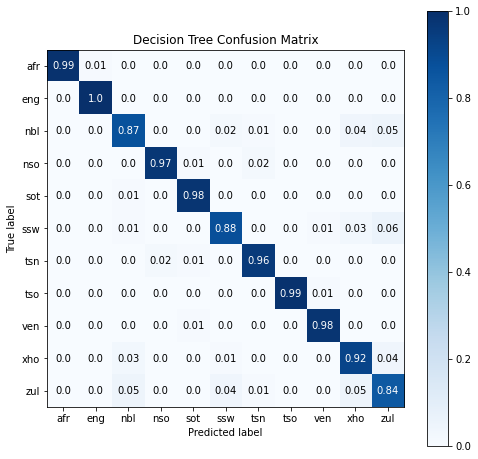

In [14]:
print('\nDecision Tree\n', classification_report(y_val, tree_prediction))
plot_confusion_matrix(y_val, tree_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [15]:
# Print the overall accuracy
decison_tree_acc = round(accuracy_score(y_val, tree_prediction),4)
print(f'\nOverall Accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )



Overall Accuracy score for Decision Tree : 0.9456

Weighted avg f1 score Decision Tree 0.9454


# Evalution of RandomForestClassifier

In [16]:
print('\nRandomForestClassifier\n', confusion_matrix(y_val, rfc_prediction))



RandomForestClassifier
 [[899   1   0   0   0   0   0   0   0   0   0]
 [  0 900   0   0   0   0   0   0   0   0   0]
 [  1   3 860   0   0   4   0   0   0   9  23]
 [  0   0   0 895   0   0   5   0   0   0   0]
 [  0   0   0   0 900   0   0   0   0   0   0]
 [  0   1   4   0   0 864   0   1   0   0  30]
 [  1   0   0   1   1   0 897   0   0   0   0]
 [  0   0   0   0   0   0   0 900   0   0   0]
 [  0   0   0   0   0   0   0   0 900   0   0]
 [  1   1   9   0   0   0   0   0   0 874  15]
 [  1   5  14   0   0   3   1   0   0  13 863]]



RandomForestClassifier
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       900
         eng       0.99      1.00      0.99       900
         nbl       0.97      0.96      0.96       900
         nso       1.00      0.99      1.00       900
         sot       1.00      1.00      1.00       900
         ssw       0.99      0.96      0.98       900
         tsn       0.99      1.00      1.00       900
         tso       1.00      1.00      1.00       900
         ven       1.00      1.00      1.00       900
         xho       0.98      0.97      0.97       900
         zul       0.93      0.96      0.94       900

    accuracy                           0.99      9900
   macro avg       0.99      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



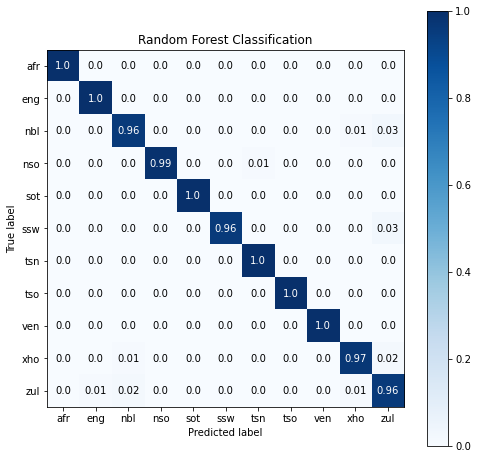

In [17]:
print('\nRandomForestClassifier\n', classification_report(y_val, rfc_prediction))
plot_confusion_matrix(y_val, rfc_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Random Forest Classification')
plt.show()

In [18]:
random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f'\nOveral accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')


Overal accuracy score for RandomForestClassifier :0.9851

Weighted f1 score for RandomForestClassifier : 0.9851


# Evaluation of LinearSVClassifier

In [19]:
print('\nLinearSVC Model\n', confusion_matrix(y_val, Lsvc_prediction))


LinearSVC Model
 [[900   0   0   0   0   0   0   0   0   0   0]
 [  0 900   0   0   0   0   0   0   0   0   0]
 [  0   0 895   0   0   0   0   0   0   1   4]
 [  0   0   0 898   0   0   2   0   0   0   0]
 [  0   0   0   1 899   0   0   0   0   0   0]
 [  0   0   0   0   0 897   0   0   0   0   3]
 [  1   0   0   2   0   0 897   0   0   0   0]
 [  0   0   0   0   0   0   0 900   0   0   0]
 [  0   0   0   0   0   0   0   0 900   0   0]
 [  0   1   1   0   0   0   0   0   0 896   2]
 [  0   1   7   0   0   1   0   0   0   2 889]]



LinearSVC Model
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       900
         eng       1.00      1.00      1.00       900
         nbl       0.99      0.99      0.99       900
         nso       1.00      1.00      1.00       900
         sot       1.00      1.00      1.00       900
         ssw       1.00      1.00      1.00       900
         tsn       1.00      1.00      1.00       900
         tso       1.00      1.00      1.00       900
         ven       1.00      1.00      1.00       900
         xho       1.00      1.00      1.00       900
         zul       0.99      0.99      0.99       900

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



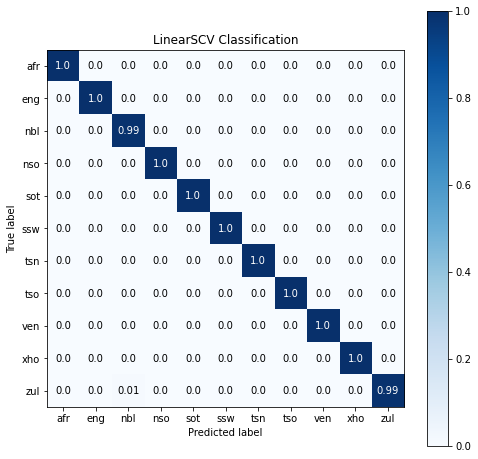

In [20]:
print('\nLinearSVC Model\n', classification_report(y_val, Lsvc_prediction))
plot_confusion_matrix(y_val, Lsvc_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('LinearSCV Classification')
plt.show()

In [21]:
linearSVC_acc = round(accuracy_score(y_val, Lsvc_prediction),4)
print(f'\nOverall accuracy score for LinearSVC Model : {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_val, Lsvc_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for LinearSVC Model : {linearSVC_f1}')


Overall accuracy score for LinearSVC Model : 0.9971

Weighted avg f1 score for LinearSVC Model : 0.9971


# Evaluation of Logistic Regression

In [22]:
# Report the confusion matrix
print('\nLogistic Regression\n', confusion_matrix(y_val, logreg_prediction))


Logistic Regression
 [[895   2   0   0   0   3   0   0   0   0   0]
 [  0 899   0   0   0   1   0   0   0   0   0]
 [  0   0 885   0   0   1   0   0   0   4  10]
 [  0   0   0 895   0   1   3   0   0   1   0]
 [  0   0   1   0 898   0   0   0   0   1   0]
 [  0   0   0   0   0 894   0   0   0   0   6]
 [  0   0   0   2   1   2 895   0   0   0   0]
 [  0   0   0   0   0   0   0 900   0   0   0]
 [  0   0   0   0   0   0   0   0 900   0   0]
 [  0   0   1   0   0   0   0   0   0 895   4]
 [  0   1  11   0   0   5   0   0   0   7 876]]



Logistic Regression
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       900
         eng       1.00      1.00      1.00       900
         nbl       0.99      0.98      0.98       900
         nso       1.00      0.99      1.00       900
         sot       1.00      1.00      1.00       900
         ssw       0.99      0.99      0.99       900
         tsn       1.00      0.99      1.00       900
         tso       1.00      1.00      1.00       900
         ven       1.00      1.00      1.00       900
         xho       0.99      0.99      0.99       900
         zul       0.98      0.97      0.98       900

    accuracy                           0.99      9900
   macro avg       0.99      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



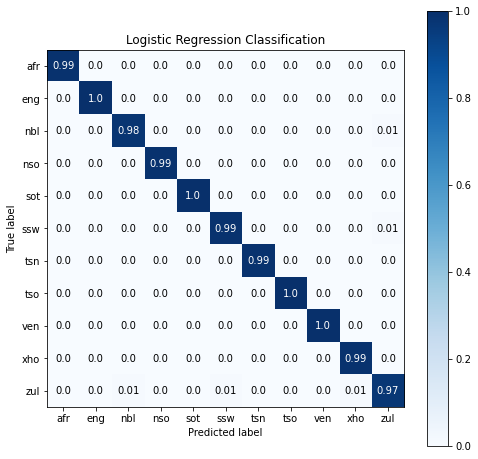

In [23]:
# Print a classification report

print('\nLogistic Regression\n', classification_report(y_val, logreg_prediction))
plot_confusion_matrix(y_val, logreg_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Logistic Regression Classification')
plt.show()


In [24]:
# Print the overall accuracy
logistic_reg_acc = round(accuracy_score(y_val, logreg_prediction),4)
print('\nLogistic Regression accuracy Score\n', logistic_reg_acc)
logistic_reg_f1 = round(f1_score(y_val, logreg_prediction, average="weighted"),4)
print('\nLogistic Regression weighted f1 score\n', logistic_reg_f1)


Logistic Regression accuracy Score
 0.9931

Logistic Regression weighted f1 score
 0.9931


# Support Vector Classfifier

In [25]:
# Confusion matrix for the random forest classifier
print('\nSupport Vector Classifier\n', confusion_matrix(y_val, SVC_prediction))


Support Vector Classifier
 [[895   0   0   0   0   0   0   0   0   4   1]
 [  0 899   0   0   0   0   0   0   0   0   1]
 [  0   0 887   0   0   0   0   0   0   3  10]
 [  0   0   0 895   0   0   3   0   0   2   0]
 [  0   0   0   1 899   0   0   0   0   0   0]
 [  0   0   0   0   0 896   0   0   0   1   3]
 [  0   0   1   1   0   0 897   0   0   0   1]
 [  0   0   0   0   0   0   0 900   0   0   0]
 [  0   0   0   0   0   0   0   0 899   1   0]
 [  0   0   1   0   0   0   0   0   0 894   5]
 [  0   1   6   0   0   1   0   0   0   4 888]]



Support Vector Classifier  Classification report :
               precision    recall  f1-score   support

         afr       1.00      0.99      1.00       900
         eng       1.00      1.00      1.00       900
         nbl       0.99      0.99      0.99       900
         nso       1.00      0.99      1.00       900
         sot       1.00      1.00      1.00       900
         ssw       1.00      1.00      1.00       900
         tsn       1.00      1.00      1.00       900
         tso       1.00      1.00      1.00       900
         ven       1.00      1.00      1.00       900
         xho       0.98      0.99      0.99       900
         zul       0.98      0.99      0.98       900

    accuracy                           0.99      9900
   macro avg       0.99      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



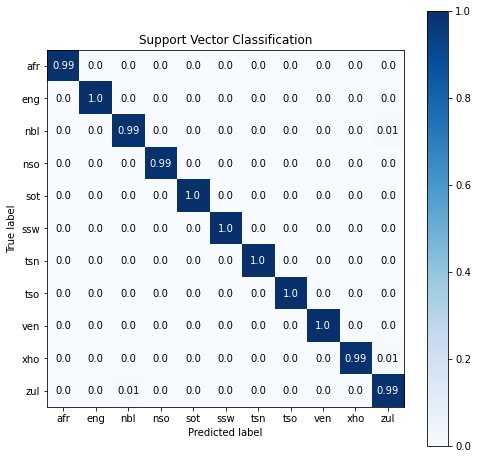

In [26]:
# The classification report 
print('\nSupport Vector Classifier  Classification report :\n', classification_report(y_val, SVC_prediction))
plot_confusion_matrix(y_val, SVC_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Support Vector Classification')
plt.show()


In [27]:
# Checking the accuracy score
svc_acc = round(accuracy_score(y_val, SVC_prediction),4)
print(f'\nSupport Vector Classifier accuracy Score :{svc_acc}')
svc_f1 = round(f1_score(y_val, SVC_prediction, average="weighted"),4)
print(f'\nSupport Vector Classifier weighted avg f1_score :{svc_f1}')


Support Vector Classifier accuracy Score :0.9948

Support Vector Classifier weighted avg f1_score :0.9949


# Evaluation of SGD Classifier

In [28]:
# Confusion matrix for the random forest classifier
print('\nSGD Classifier\n', confusion_matrix(y_val, SGD_prediction))


SGD Classifier
 [[900   0   0   0   0   0   0   0   0   0   0]
 [  0 900   0   0   0   0   0   0   0   0   0]
 [  1   0 889   0   0   1   0   0   0   2   7]
 [  0   0   0 898   0   0   2   0   0   0   0]
 [  0   0   0   1 899   0   0   0   0   0   0]
 [  0   1   0   0   0 894   0   0   0   1   4]
 [  1   0   0   2   0   0 897   0   0   0   0]
 [  0   0   0   0   0   0   0 900   0   0   0]
 [  0   0   0   0   0   0   0   0 900   0   0]
 [  0   1   1   0   0   0   0   0   0 896   2]
 [  0   1   8   0   0   2   0   0   0   6 883]]



SGD Classifier  Classification report :
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       900
         eng       1.00      1.00      1.00       900
         nbl       0.99      0.99      0.99       900
         nso       1.00      1.00      1.00       900
         sot       1.00      1.00      1.00       900
         ssw       1.00      0.99      0.99       900
         tsn       1.00      1.00      1.00       900
         tso       1.00      1.00      1.00       900
         ven       1.00      1.00      1.00       900
         xho       0.99      1.00      0.99       900
         zul       0.99      0.98      0.98       900

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



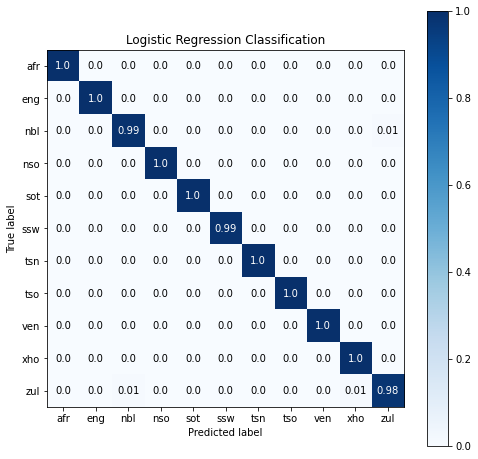

In [29]:
# The classification report 
print('\nSGD Classifier  Classification report :\n', classification_report(y_val, SGD_prediction))
plot_confusion_matrix(y_val, SGD_prediction, normalize=True,figsize=(8,8),cmap='Blues')
plt.title('Logistic Regression Classification')
plt.show()

In [30]:
# Checking the accuracy score
sgd_acc = round(accuracy_score(y_val, SGD_prediction),4)
print('\nSGD Classifier accuracy Score :\n', sgd_acc)

# Checking the f1_score report for the decison tree model
sgd_f1 = round(f1_score(y_val, SGD_prediction, average="weighted"),4)
print('\nSGD weighted avg f1_score :\n', sgd_f1)


SGD Classifier accuracy Score :
 0.9956

SGD weighted avg f1_score :
 0.9956


# Ridge Classifier

In [31]:
# Checking the f1_score report for the decison tree model
multi_f1 = round(f1_score(y_val, multi_prediction, average="weighted"),2)
print('\nmulti weighted avg f1_score :\n', multi_f1)
# Checking the accuracy score

print('Accuracy %s' % accuracy_score(multi_prediction, y_val))

report = classification_report(y_val, multi_prediction, output_dict=True)
results = pd.DataFrame(report).transpose()
results


multi weighted avg f1_score :
 1.0
Accuracy 0.9982828282828283


,precision,recall,f1-score,support
afr,0.997783,1.000000,0.998890,900.000000
eng,0.992282,1.000000,0.996126,900.000000
nbl,0.994463,0.997778,0.996118,900.000000
nso,0.998890,1.000000,0.999445,900.000000
sot,1.000000,1.000000,1.000000,900.000000
ssw,1.000000,0.998889,0.999444,900.000000
tsn,1.000000,0.997778,0.998888,900.000000
tso,1.000000,1.000000,1.000000,900.000000
ven,1.000000,1.000000,1.000000,900.000000
xho,1.000000,0.996667,0.998331,900.000000


In [32]:
# Checking the accuracy score
multi_acc = round(accuracy_score(y_val, multi_prediction),2)
print(f'\nMultinomialNB accuracy Score : {multi_acc}')
multi_f1 = round(f1_score(y_val, multi_prediction, average="weighted"),2)
print(f'\nMultinomialNB weighted avg f1 score : {multi_f1}')
report = classification_report(y_val, multi_prediction, output_dict=True)
results = pd.DataFrame(report).transpose()
results


MultinomialNB accuracy Score : 1.0

MultinomialNB weighted avg f1 score : 1.0


,precision,recall,f1-score,support
afr,0.997783,1.000000,0.998890,900.000000
eng,0.992282,1.000000,0.996126,900.000000
nbl,0.994463,0.997778,0.996118,900.000000
nso,0.998890,1.000000,0.999445,900.000000
sot,1.000000,1.000000,1.000000,900.000000
ssw,1.000000,0.998889,0.999444,900.000000
tsn,1.000000,0.997778,0.998888,900.000000
tso,1.000000,1.000000,1.000000,900.000000
ven,1.000000,1.000000,1.000000,900.000000
xho,1.000000,0.996667,0.998331,900.000000


# Model Comparision

In [33]:
# Creating a dataframe with our models and their performances metrics
classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC','Logistic Regression','Stochastic Gradient Descent','Support Vector Classifier','MultinomialNB'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,logistic_reg_acc, sgd_acc, svc_f1, multi_acc],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,logistic_reg_f1, sgd_f1, svc_f1, multi_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

,Classifiers,Accuracy,Weighted avg f1 Score
0,Decision Tree,0.9456,0.9454
1,Random Forest,0.9851,0.9851
3,Logistic Regression,0.9931,0.9931
5,Support Vector Classifier,0.9949,0.9949
4,Stochastic Gradient Descent,0.9956,0.9956
2,LinearSVC,0.9971,0.9971
6,MultinomialNB,1.0000,1.0000


In [40]:
#from sklearn.pipeline import Pipeline
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#from sklearn.model_selection import train_test_split, GridSearchCV
#text_clf = Pipeline([('vect', CountVectorizer()),
                    # ('tfidf', TfidfTransformer()),
                     #('clf', MultinomialNB())])
#tuned_parameters = {
    #'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf__alpha': [1, 1e-1, 1e-2]
#}

In [45]:

#from sklearn.metrics import classification_report
#clf = GridSearchCV(text_clf, tuned_parameters, cv=10)
#clf.fit(X_train, y_train)

#print(classification_report(y_val, clf.predict(X_test), digits=4))

KeyboardInterrupt: 

# Hyperparameter Tunning

In [35]:
# Feature engineering

#X_train_new= X_train.copy
#X_val_new = X_val.copy()

#vectorizer = TfidfVectorizer(sublinear_tf=True, smooth_idf = True, max_df = 0.3, min_df = 5, ngram_range = (1, 2))
#vectorizer.fit(X_train)

#X_train_new = vectorizer.transform(X_train)
#X_val_new = vectorizer.transform(X_val)

# Tuning Logistic Regression

# Tuning LinearSVC

# Final prediction

In [36]:
y_pred = multi.predict(X_test)

In [37]:
y_pred

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'tso'], dtype='<U3')

In [38]:
test['lang_id'] = y_pred

In [39]:
test[['index','lang_id']].to_csv('testsubmission2_rf.csv', index=False)